<a href="https://colab.research.google.com/github/Atharva-D/MOT/blob/main/MOT_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
from sklearn.impute import KNNImputer
# Autoreg, autocorrolationand time series tools...

from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
#from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic


plt.style.use('seaborn-whitegrid')

from termcolor import colored

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# reading the csv file
data = pd.read_csv("/content/gdrive/MyDrive/MOT/India_Data/All India Data/city_day.csv").sort_values(by = ['Date', 'City'])
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
4294,Bengaluru,2015-01-01,NaN,NaN,3.26,17.33,10.88,20.36,0.33,3.54,10.73,0.56,4.64,NaN,NaN,NaN
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN,NaN
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
19846,Lucknow,2015-01-01,NaN,NaN,2.11,13.46,4.57,NaN,12.15,169.57,25.92,1.35,3.93,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25721,Patna,2020-07-01,35.42,57.82,44.50,31.15,57.72,1.14,0.82,3.99,25.76,1.73,5.50,2.14,98.0,Satisfactory
26031,Shillong,2020-07-01,16.70,29.40,0.97,2.70,1.04,2.66,0.10,4.29,17.71,0.00,0.02,NaN,24.0,Good
26956,Talcher,2020-07-01,24.85,31.06,27.73,29.36,57.09,1.37,1.52,14.42,14.90,0.00,NaN,NaN,101.0,Moderate
28068,Thiruvananthapuram,2020-07-01,2.00,35.00,1.68,2.30,2.58,5.62,0.42,6.15,22.10,NaN,NaN,NaN,41.0,Good


In [4]:
data['City'].unique()

array(['Ahmedabad', 'Bengaluru', 'Chennai', 'Delhi', 'Lucknow', 'Mumbai',
       'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar',
       'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati',
       'Brajrajnagar', 'Talcher', 'Kolkata', 'Guwahati', 'Coimbatore',
       'Shillong', 'Chandigarh', 'Bhopal', 'Ernakulam', 'Kochi', 'Aizawl'],
      dtype=object)

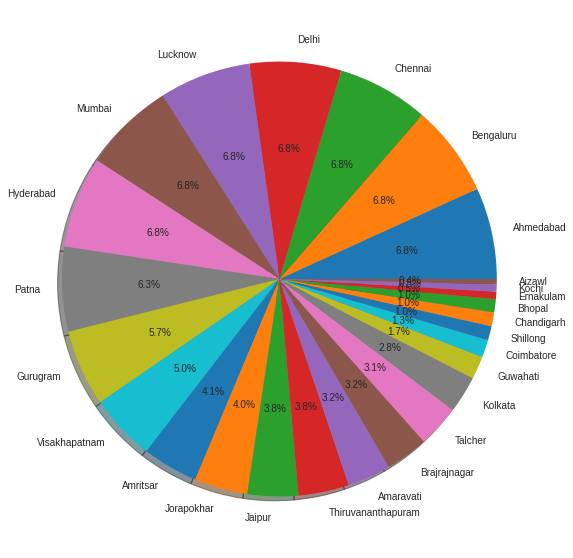

In [5]:
from IPython.core.pylabtools import figsize
x = data['City'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(x,labels=x.index,
        autopct='%.1f%%',shadow=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

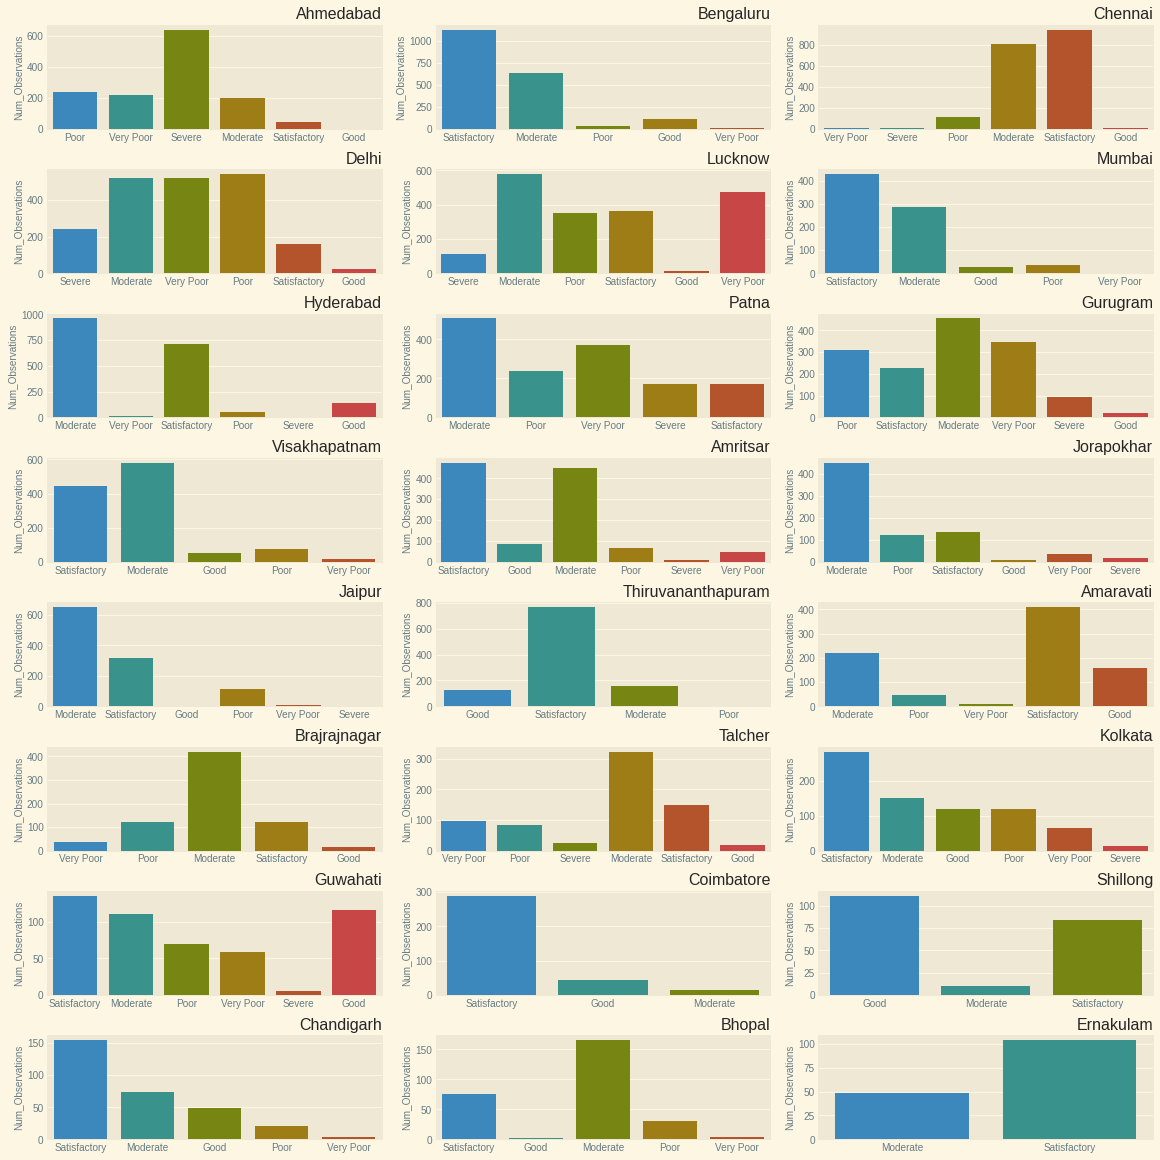

In [6]:
plt.style.use('Solarize_Light2')
plt.rcParams['font.size']=10
Cities=[x for x in data['City'].unique()]
fig,ax=plt.subplots(8,3,figsize=(16,16),constrained_layout=True)
n=0
for i in range(8):
    for j in range(3):
            sns.countplot(data[data['City']==Cities[n]]['AQI_Bucket'],ax=ax[i,j])
            ax[i,j].set_title(Cities[n],y=1,loc='right')
            ax[i,j].set_xlabel('')
            ax[i,j].set_ylabel('Num_Observations',size=10)
            n+=1
plt.show()

#**Distribution of AQI**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

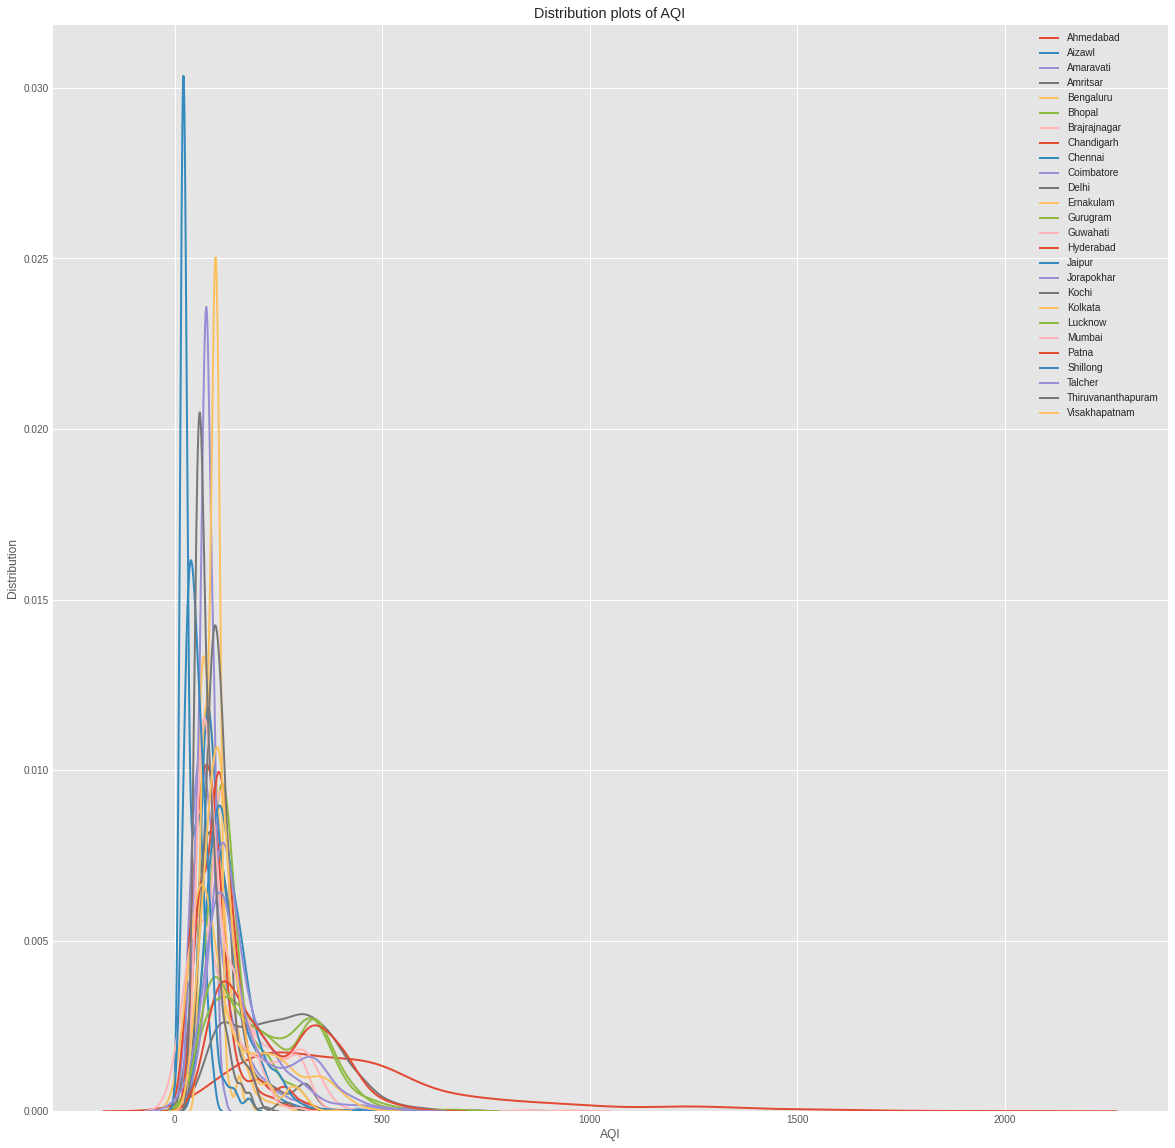

In [7]:
plt.style.use('ggplot')
fig,ax=plt.subplots(figsize=(20,20))
for key,grp in data.groupby('City'):
    sns.distplot(grp['AQI'],label=key,hist=False,ax=ax)
plt.title('Distribution plots of AQI')
plt.xlabel('AQI')
plt.ylabel('Distribution')
plt.legend()

In [8]:
data.Date = data.Date.apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))

In [9]:
df = data.drop(columns = ['Date', 'AQI_Bucket', 'AQI']).groupby('City').sum().reset_index()
fig = px.treemap(pd.melt(df, id_vars = 'City'), path=['City','variable'],
                 values=pd.melt(df, id_vars = 'City')['value'],
                 title = 'Cities and the proportion of pollution in each')
fig.show()

In [10]:
data_Delhi = data.loc[data['City'] == "Delhi"]
data_Delhi


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate
12234,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate
12235,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor
12236,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate


In [11]:
data_Delhi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 10229 to 12237
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        2009 non-null   object        
 1   Date        2009 non-null   datetime64[ns]
 2   PM2.5       2007 non-null   float64       
 3   PM10        1932 non-null   float64       
 4   NO          2007 non-null   float64       
 5   NO2         2007 non-null   float64       
 6   NOx         2009 non-null   float64       
 7   NH3         2000 non-null   float64       
 8   CO          2009 non-null   float64       
 9   SO2         1899 non-null   float64       
 10  O3          1925 non-null   float64       
 11  Benzene     2009 non-null   float64       
 12  Toluene     2009 non-null   float64       
 13  Xylene      1228 non-null   float64       
 14  AQI         1999 non-null   float64       
 15  AQI_Bucket  1999 non-null   object        
dtypes: datetime64[ns](1

In [12]:
data_Delhi.isnull().sum()

City            0
Date            0
PM2.5           2
PM10           77
NO              2
NO2             2
NOx             0
NH3             9
CO              0
SO2           110
O3             84
Benzene         0
Toluene         0
Xylene        781
AQI            10
AQI_Bucket     10
dtype: int64

#**Visualizing the Null Values**

In [13]:
px.imshow(data_Delhi.isnull())

In [14]:
data_Delhi=data_Delhi.ffill().bfill() #Fill the NaN values

In [15]:
data_Delhi.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [16]:
data_Delhi.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000
mean,117.101215,233.949716,38.971533,50.769856,58.567023,41.957636,1.976053,16.026446,50.816546,3.544480,17.185042,1.015037,258.632653
std,82.926225,120.039481,33.375798,22.690612,37.690350,17.286741,2.560253,8.061479,25.642551,2.431232,15.291597,1.997044,119.883918
min,10.240000,18.590000,3.570000,10.630000,0.000000,6.780000,0.000000,2.340000,6.940000,0.000000,0.000000,0.000000,29.000000
25%,57.080000,138.560000,15.900000,33.900000,31.150000,31.110000,0.910000,10.330000,34.050000,1.870000,6.650000,0.000000,159.000000
50%,94.490000,219.940000,27.200000,47.020000,52.750000,38.010000,1.240000,14.700000,43.290000,2.960000,12.750000,0.180000,257.000000
75%,152.990000,309.370000,50.720000,63.570000,75.360000,48.680000,1.870000,20.360000,59.880000,4.680000,23.200000,1.440000,345.000000
max,685.360000,796.880000,221.030000,162.500000,254.800000,166.700000,30.440000,71.560000,257.730000,20.640000,103.000000,23.300000,716.000000


#**Line graph of each of feature**

In [17]:
col_names = []
for column in data_Delhi:
  col_names.append(column)

In [18]:
col_no = 1
fig = make_subplots(rows=7, cols = 2,  subplot_titles=col_names[2:-1])
for count,name in enumerate(col_names[2:-1]):
  fig.add_trace(go.Scatter(x =data_Delhi["Date"], y = data_Delhi[name]), row = int(count/2+1), col = col_no)
  if col_no ==1:
    col_no = 2
  else:
    col_no = 1
  
fig.update_layout(height=3000, width=1300)
fig.show()


# **Bar Chart showing Montly distribution of AIQ over the years**

In [21]:
df = pd.read_csv("/content/gdrive/MyDrive/MOT/India_Data/All India Data/city_day.csv", parse_dates = ["Date"], index_col = "Date")
df = df.loc[df['City'] == "Delhi"]

year = ['2015','2016','2017','2018','2019','2020']

col_no = 1
fig = make_subplots(rows=3, cols = 2, subplot_titles=year)

for count,name in enumerate(year):

  y_month = np.array(df[str(name)].AQI.resample("M").mean())
  x_month = pd.date_range(start = "2015-01-01", periods = len(y_month), freq = "M")

  fig.add_trace(go.Bar(y = y_month, x = x_month), int(count/2+1), col_no)
  if col_no == 1:
    col_no = 2
  else:
    col_no = 1
    
fig.update_layout(height=1500, width=1500)
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



#**Box plot for each of the feature**

In [22]:
px.box(data_frame = data_Delhi.iloc[:,2:-1])

#**Heat map for the correlation matrix**

In [23]:
heatmap = data_Delhi.corr()
fig = px.imshow(heatmap,text_auto=True,aspect="auto")
fig.show()

#**Finding days where AQI(air quality index) is minimum and maximum**

In [24]:
worst_day = df.loc[df["AQI"] == df["AQI"].max()]
best_day = df.loc[df["AQI"] == df["AQI"].min()]
print("Most polluted day: ", np.array(worst_day.index))
print("Least polluted day: ", np.array(best_day.index))

Most polluted day:  ['2016-11-07T00:00:00.000000000']
Least polluted day:  ['2017-07-31T00:00:00.000000000']


#**Date-wise AQI**

In [25]:
data = data_Delhi.sort_values(by='Date')
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate
12234,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate
12235,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor
12236,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate


#**Pollutants proportion**

In [26]:
da = data_Delhi.drop(columns = ['Date', 'AQI_Bucket', 'AQI']).groupby('City').sum().reset_index()

In [27]:
fig = px.treemap(pd.melt(da, id_vars = 'City'), path=['City','variable'],
                 values=pd.melt(da, id_vars = 'City')['value'],
                 title = 'Proportion of pollution caused by various pollutants in Delhi')
fig.show()

#**Histogram**

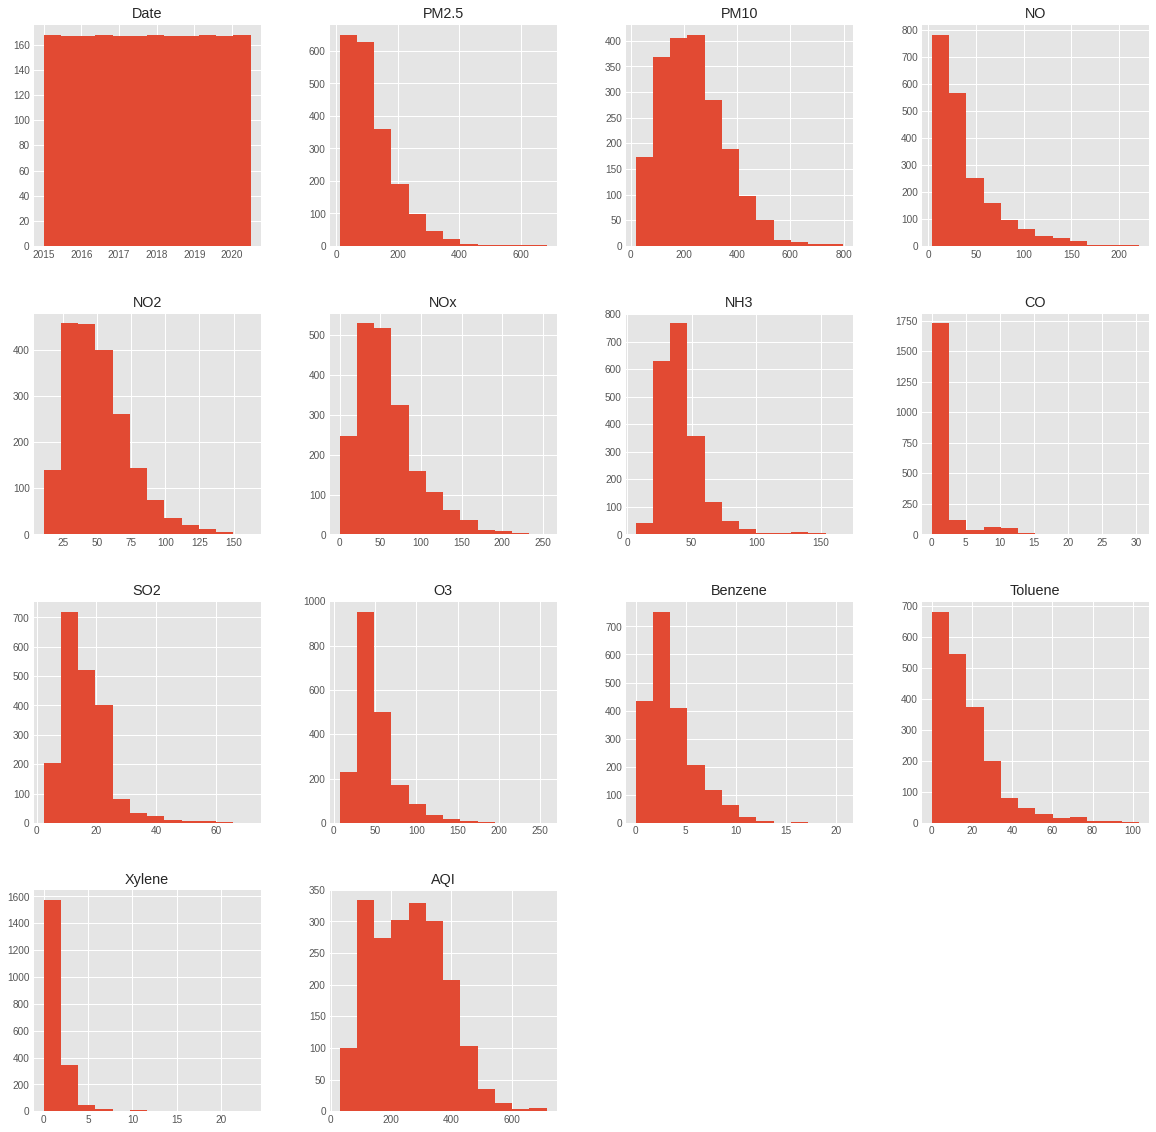

In [28]:
data_Delhi.hist(bins=12,figsize=(20,20))
plt.show()

<BarContainer object of 2009 artists>

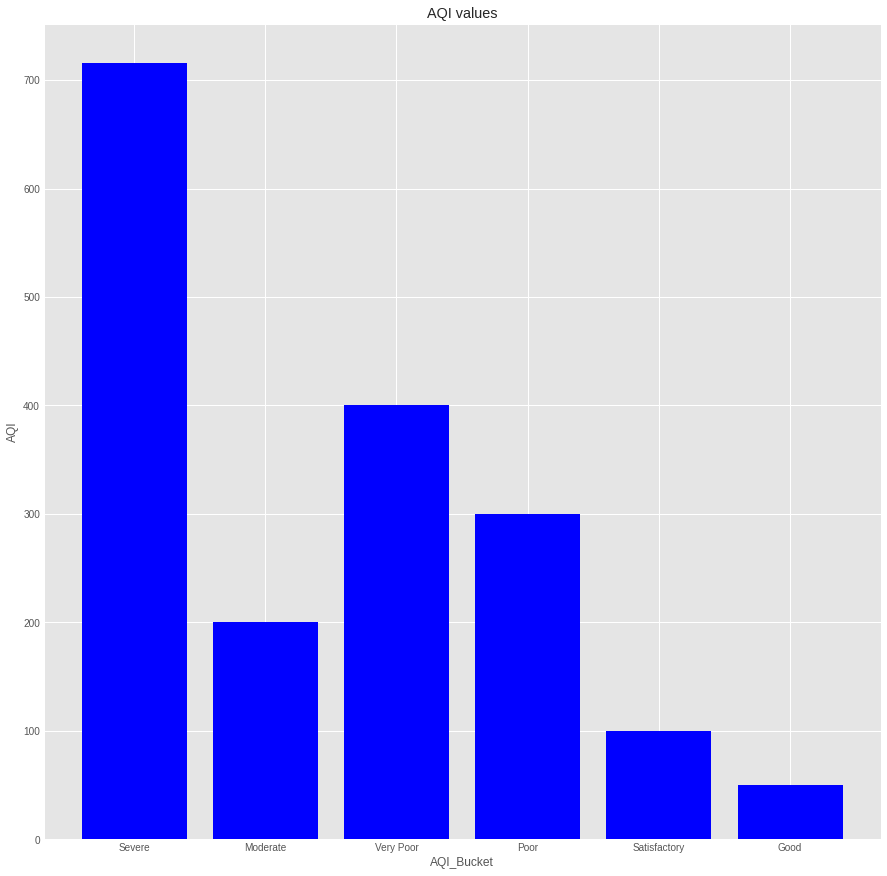

In [34]:
x = data_Delhi['AQI_Bucket']
y = data_Delhi['AQI']
plt.figure(figsize=(15,15))
plt.title("AQI values")
plt.xlabel("AQI_Bucket")
plt.ylabel("AQI")
plt.bar(x,y,color="blue")